# Sweeps Results

In [30]:
%matplotlib inline

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from typing import List, Optional

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [46]:
MODEL_LABELS = {
    "deepsets_mlp_sum": "DeepSets + Sum",
    "deepsets_mlp_max": "DeepSets + Max",
    "deepsets_mlp_fspool": "DeepSets + FSPool",
    "mlp": "MLP",
    "sorted_mlp": "Sort + MLP",
    "pna": "PNA",
    "small_set_transformer": "Set Transformer",
}

def plot_results(results: pd.DataFrame, title: str, y_limits: List[float], ax: matplotlib.axes.Axes) -> None:
    loss_mean = results.groupby(by="type").mean()["avg_test_loss"]
    loss_std = results.groupby(by="type").std()["avg_test_loss"]
    models = [MODEL_LABELS[model] for model in results["type"].unique()]
    ax.errorbar(
        models,
        loss_mean,
        yerr=loss_std,
        fmt='-o'
    )
    ax.set_title(title)
    ax.set_ylabel("Loss")
    ax.set_xticklabels(models, rotation=45)
    if y_limits is not None:
        ax.set_ylim(y_limits)

def plot_task_results(task: str, y_limits: Optional[List[float]] = None) -> None:
    results = pd.read_csv(os.path.join("sweeps-results", f"{task.replace('_', '-')}-results.csv"))
    relevant_columns = ["type", "multisets", "random_seed", "avg_test_loss"]
    results = results[relevant_columns]

    set_results = results[results["multisets"] == False]
    multiset_results = results[results["multisets"] == True]

    fig, axes = plt.subplots(1, 2, figsize=(15,6))
    fig.set_facecolor("white")
    plt.rcParams.update({'font.size': 14})

    title = f"Label: {task}"
    plot_results(set_results, title=title + ", Sets", y_limits=y_limits, ax=axes[0])
    plot_results(multiset_results, title=title + ", Multisets", y_limits=y_limits, ax=axes[1])

    plt.tight_layout()
    plt.show()

## Simple Tasks - Contribution Complexity $\mathcal{O}(1)$

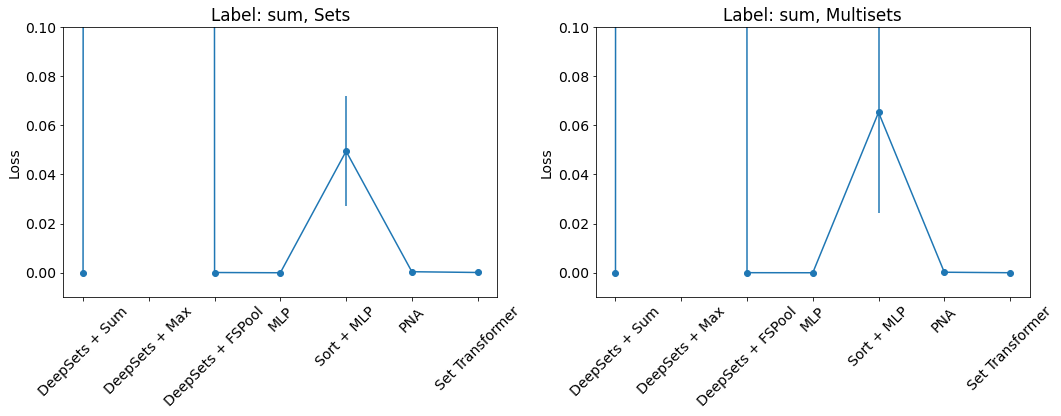

In [69]:
plot_task_results("sum", y_limits=[-0.01,0.1])

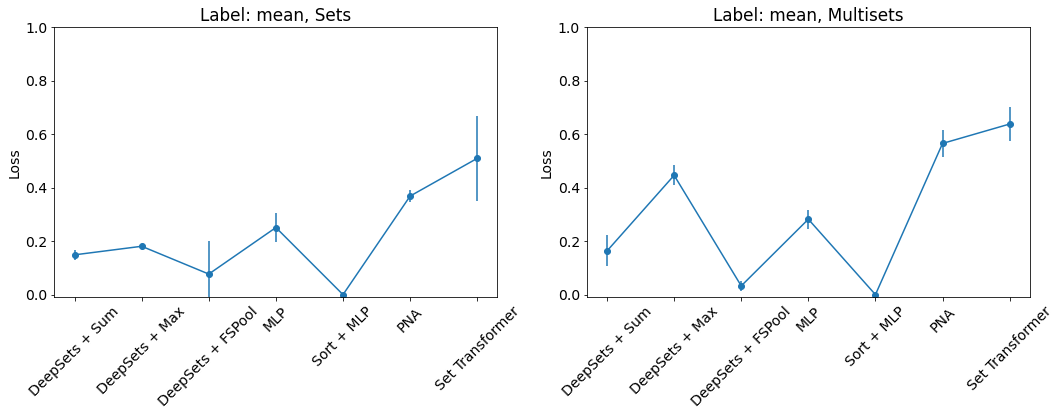

In [76]:
plot_task_results("mean", y_limits=[-0.01,1])

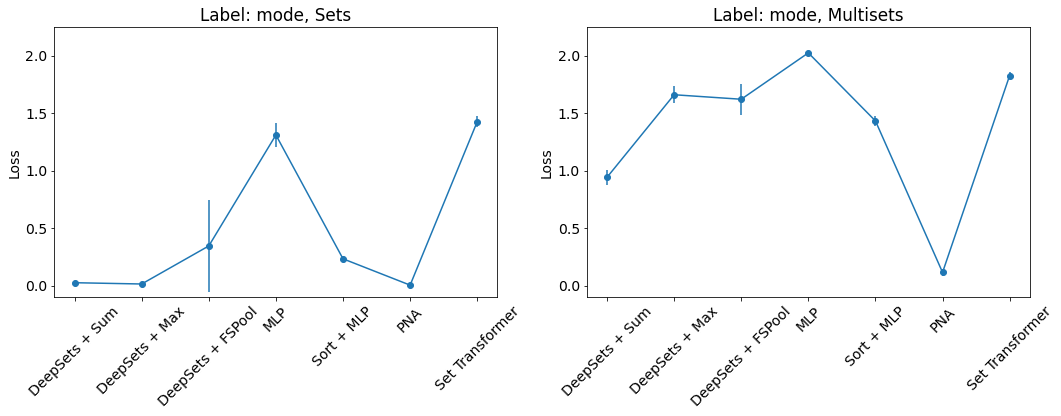

In [57]:
plot_task_results("mode", y_limits=[-0.1,2.25])

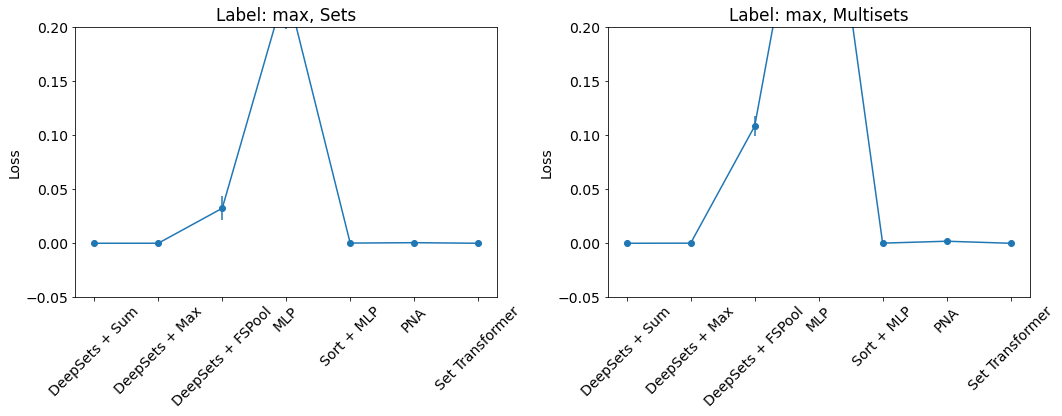

In [71]:
plot_task_results("max", y_limits=[-0.05,0.2])

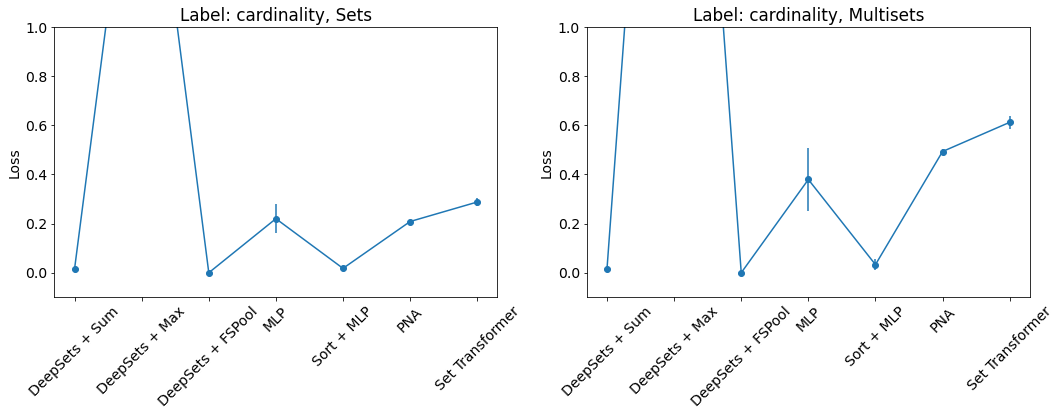

In [51]:
plot_task_results("cardinality", y_limits=[-0.1,1])

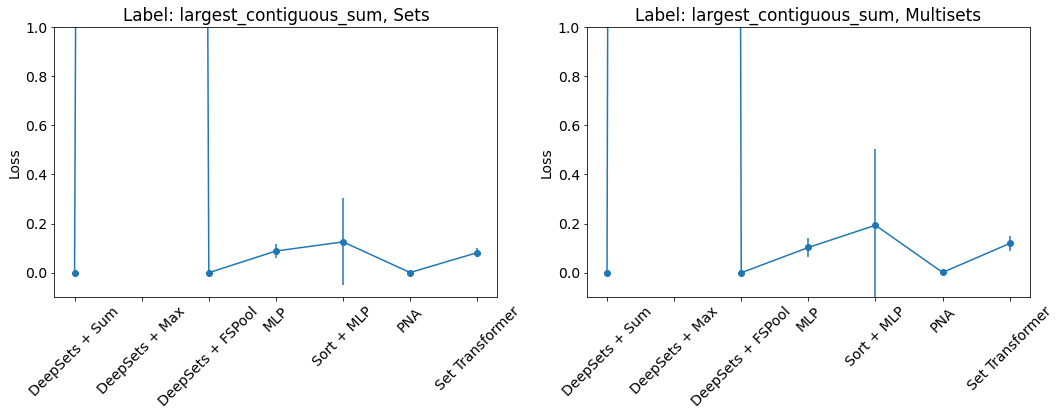

In [62]:
plot_task_results("largest_contiguous_sum", y_limits=[-0.1,1])

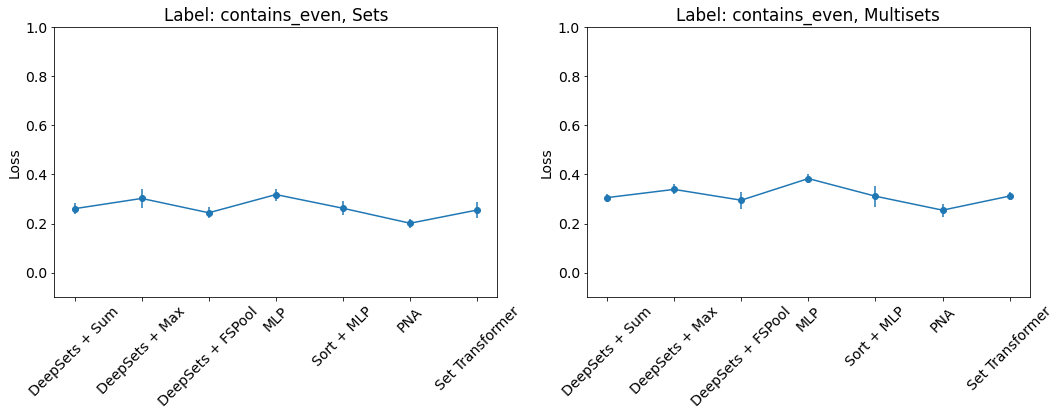

In [63]:
plot_task_results("contains_even", y_limits=[-0.1,1])

## Higher Order Tasks - Contribution Complexity $\mathcal{O}(n)$

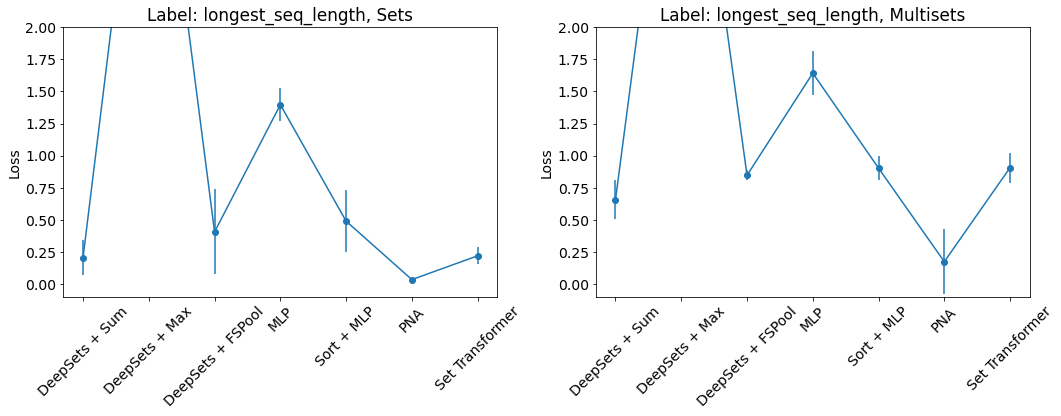

In [59]:
plot_task_results("longest_seq_length", y_limits=[-0.1,2])

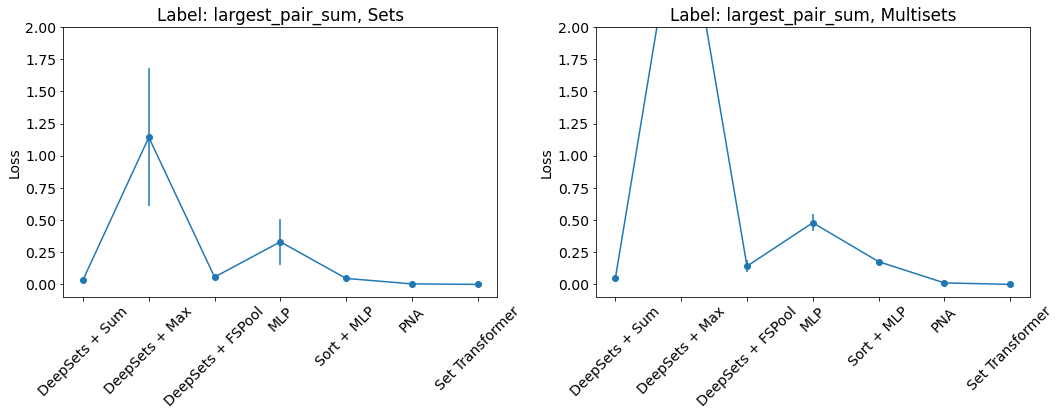

In [70]:
plot_task_results("largest_pair_sum", y_limits=[-0.1,2])

## Higher Order Tasks - Contribution Complexity $\mathcal{O}(n^2)$

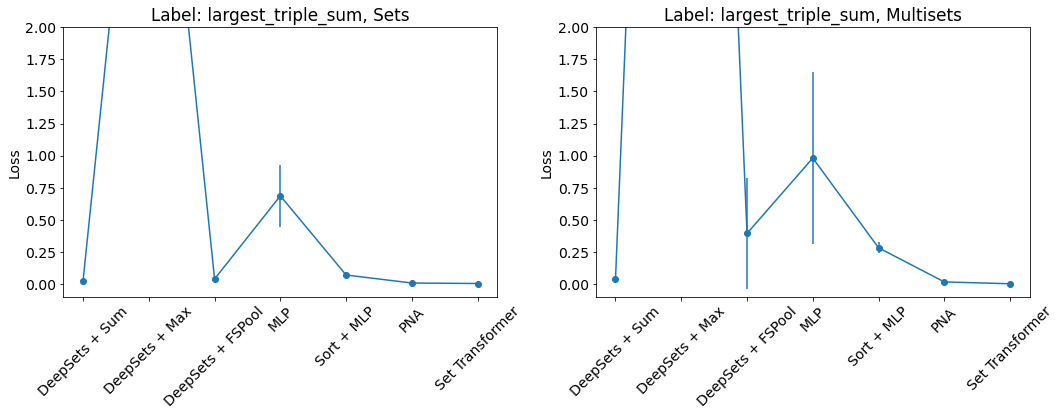

In [72]:
plot_task_results("largest_triple_sum", y_limits=[-0.1,2])